# Homework 3: Neural Networks


This assignment is due on Moodle by **11:59pm on Monday March 15**. 
Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.
Your solutions to computational questions should include any specified Python code and results 
as well as written commentary on your conclusions.
Remember that you are encouraged to discuss the problems with your instructors and classmates, 
but **you must write all code and solutions on your own**. For a refresher on the course **Collaboration Policy** click [here](https://github.com/akkikiki/CSCI-4622-Machine-Learning-sp21/blob/main/info/syllabus.md#collaboration-policy).


**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda (Version: 2019.07) with Python 3.7. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- In this homework, we will use [PyTorch](https://pytorch.org/) and PyTorch Lightning to implement a classifier. First upgrade your `pip` package manager to the latest version (Version >19.0). Then install the current stable release for [PyTorch](https://pytorch.org/get-started/locally/) (version: 1.6.0) as the backend for PyTorch Lightning. Then install [PyTorch Lighntning](https://pytorch-lightning.readthedocs.io/en/0.9.0/) (make sure to isntall version: 0.9.0 for this HW).

```
pip install --upgrade pip

pip install torch

pip install pytorch-lightning==0.9.0

```

It is **highly recommended** you install the CPU-only version of PyTorch if your'e unfamiliar with the process of installing CUDA libraries for these packages. If you choose to install a GPU version, ensure you're code runs without GPU support.

**Acknowledgment** : Chris Ketelsen, Chenhao Tan

**Please put your name and cuidentity username.**

**Name**: Kai Hueske-VanCeylon

**Identity Key**: kahu1945

In [4]:
import math
import pickle
import gzip
import numpy as np
import pandas
import matplotlib.pylab as plt
%matplotlib inline

# Test PyTorch installation
import torch 
import pytorch_lightning as pl

pl.seed_everything(1234)

1234

[20 points] Problem 1 - Single-Layer and Multilayer Perceptron Learning
---

### Part 1 [10 points] 
Consider learning the following concepts with either a single-layer or multilayer perceptron where all hidden and output neurons utilize the *indicator* activation functions. For each of the following concepts, state whether the concept can be learned by a single-layer perceptron. Briefly justify your response by providing weights, biases, and the *indicator* activation functions if applicable:

- $\; \texttt{NOT } x_1$

- $\; x_1 \texttt{ NAND } x_2$

- $\; x_1 \texttt{ XNOR } x_2$ (output 1 when $x_1 = x_2$ and 0 otherwise)

$\texttt{NOT} x_1$ can be learned by a single-layer perceptron. For input $x_1 \in \{ 0, 1 \}$ representing $\{ false, true \}$, our weight is $w = -1$ and our bias is $0.5$, so $f(0) = (-1)(0) + 0.5 = 0.5 > 0, \hat{y} = 1$ and $f(1) = (-1)(1) + 0.5 = -0.5 < 0, \hat{y} = -1$ as expected.  
$x_1 \texttt{NAND} x_2$ can also be learned. For the same input representations, we can use parameters $\textbf{w} = [-1, -1], b = 1.5$. This means that:  
$f(1, 1) = (-1)(1) + (-1)(1) + 1.5 = -0.5 < 0, \hat{y} = -1$  
$f(1, 0) = (-1)(1) + (-1)(0) + 1.5 = 0.5 > 0, \hat{y} = 1$  
$f(0, 1) = (-1)(0) + (-1)(1) + 1.5 = 0.5 > 0, \hat{y} = 1$  
$f(0, 0) = (-1)(0) + (-1)(0) + 1.5 = 1.5 > 0, \hat{y} = 1$  
$x_1 \texttt{XNOR} x_2$, however, isn't linearly separable, so it can't be learned by a single-layer perceptron. No set of weights can be constructed to make it work.

### Part 2 [10 points] 

Determine an architecture and specific values of the weights and biases in a single-layer or multilayer perceptron with *indicator* activation functions that can learn $x_1 \texttt{ XNOR } x_2$. Make a truth table of $x_1$, $x_2$, and $x_1 \texttt{ XNOR } x_2$, describe your perceptron's architecture, and state your weight matrices and bias vectors in Markdown below. Then demonstrate that your solution is correct by implementing forward propagation for your network in Python and showing that it produces the correct boolean output values for each of the four possible combinations of $x_1$ and $x_2$.

The truth table for $\texttt{XNOR}$ is:  
| $x_1$ | $x_2$ | $\texttt{XNOR}$ |  
| 1     | 1     | 1               |  
| 1     | 0     | 0              |  
| 0     | 1     | 0              |  
| 0     | 0     | 1               |  
We'll use a fully-connected network with 1 input layer of 3 nodes ($x_1, x_2, b$) and 1 hidden layer of 2 nodes ($h_1, h_2$). The indicator activation function is applied at each node in the hidden and output layer.  
Our weight matrices will be $W^1 = 
\begin{bmatrix}
    1 & 1 \\
    -1 & -1 
\end{bmatrix}$, $W_2 = 
\begin{bmatrix}
    2 \\
    2
\end{bmatrix}$
, with bias vectors $ b_1 = 
\begin{bmatrix}
    -1 \\
    1
\end{bmatrix}$, $b_2 = -1$.

In [5]:
w1 = [[1, 1], [-1, -1]]
w2 = [2, 2]

b1 = [-1, 1]
b2 = -1

def multi_predict(x):
    h = [1 if np.dot(w1[i], x) + b1[i] > 0 else 0 for i in range(2)]
    print(h)
    res = np.dot(w2, h) + b2
    print(res)
    return res > 0
    
a = multi_predict([1, 1])
b = multi_predict([1, 0])
c = multi_predict([0, 1])
d = multi_predict([0, 0])
print(a, b, c, d)

[1, 0]
1
[0, 0]
-1
[0, 0]
-1
[0, 1]
1
True False False True


[25 points] Problem 2 - Back propagation
---

In this problem you will gain some intuition about why training deep neural networks can be very time consuming.  Consider training a chain-like neural network: 

![chain-like nn](figs/chain_net.png)

Note that this network has three weights $W^1, W^2, W^3$ and three biases $b^1, b^2,$ and $b^3$ (for this problem you can think of each parameter as a single value or as a $1 \times 1$ matrix). Suppose that each hidden and output neuron is equipped with a sigmoid activation function and the loss function is given by 

$$
\ell(y, a^3) = \frac{1}{2}(y - a^3)^2  
$$

where $a^3$ is the value of the activation at the output neuron and $y \in \{0,1\}$ is the true label associated with the training example. 

### Part 1 [5 points]
Suppose each of the weights is initialized to $W^k = -1.0$ and each bias is initialized to $b^k = 0.5$.  Use forward propagation to find the activities and activations associated with each hidden and output neuron for the training example $(x, y) = (0.5,0)$. Show your work. 

For hidden layers $h_1, h_2$:
$
x = 0.5 \\
h_1 = \sigma (W^1 \cdot x + b^1) = \sigma((-1)(0.5) + 0.5)) = \sigma(0) = 0.5 \\
h_2 = \sigma (W^2 \cdot h_1 + b^2) = \sigma(0) = 0.5 \\
y = \sigma(W^3 \cdot h_2 + b^3) = \sigma(0) = 0.5
$

### Part 2 [5 points]:
Use Back-Propagation to compute the weight and bias derivatives $\partial \ell / \partial W^k$ and $\partial \ell / \partial b^k$ for $k=1, 2, 3$.  Show all work. 

$
\sigma' (z) = \sigma (z) (1 - \sigma(z)) \\
\partial \ell / \partial a = -a^3 (y - a^3) \\
--- \\
\delta^3 = \partial \ell / \partial a^3 \cdot \partial a^3 / \partial z^3 \\
= -a^3 (y - a^3) \cdot \sigma (z^3) (1 - \sigma(z^3)) = -0.5 (0 - 0.5) \cdot \sigma (0) (1 - \sigma(0) = 0.25 \cdot 0.25 = 0.0625 \\
\partial \ell / \partial \textbf{b}^3 = \delta^3 = 0.0625 \\
\partial \ell / \partial \textbf{W}^3 = \delta^3 a^2 = 0.0625 \cdot 0.5 = 0.03125 \\
--- \\
\delta^2 = \textbf{W}^{3T} \delta^3 \odot \sigma(z^2) (1 - \sigma(z^2)) = -0.015625 \\
\partial \ell / \partial \textbf{b}^2 = \delta^2 = -0.015625 \\
\partial \ell / \partial \textbf{W}^2 = \delta^2 a^1 = -0.015625 \cdot 0.5 = - 0.0078125\\
--- \\
\delta^1 = \textbf{W}^{2T} \delta^2 \odot \sigma(z^1) (1 - \sigma(z^1)) = 0.00390625 \\
\partial \ell / \partial \textbf{b}^2 = \delta^2 = 0.00390625 \\
\partial \ell / \partial \textbf{W}^2 = \delta^2 a^1 = 0.00390625 \cdot 0.5 = 0.001953125\\
$

### Part 3 [5 points]
Implement the following activation functions in NumPy:
* ReLU
* Sigmoid
* softmax
Please **do not use any other external libraries** for this such as sklearn.

In [6]:
def relu(x):
    return max(x, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-1 * x))

def softmax(x):
    prenorm = [np.exp(xi) for xi in x]
    norm_sum = np.sum(prenorm)
    return prenorm / norm_sum

In [7]:
# random tests for checking your impementation.
from tests import tests
tests.run_test_suite('prob 2.3', (relu, sigmoid, softmax))

TestRelu (tests.tests.TestActiv) ... ok
TestSigmoid (tests.tests.TestActiv) ... ok
TestSoftmax (tests.tests.TestActiv) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.011s

OK


### Part 4 [5 points] 
Implement the following Loss functions in NumPy:
* mean squared error
* mean absolute error
* hinge

Please **do not use any other external libraries** for this such as sklearn.

In [8]:
def mean_squared_error(yhat, y):
    return np.mean((yhat - y)**2)
    
def mean_absolute_error(yhat, y):
    return np.mean(abs(yhat - y))

def hinge(yhat, y):
    diffs = [max(0, 1 - yhat[i] * y[i]) for i in range(len(yhat))]
    return np.mean(diffs)

In [9]:
# random tests for checking your impementation.
from tests import tests
tests.run_test_suite('prob 2.4', (mean_squared_error, mean_absolute_error, hinge))

TestMSE (tests.tests.TestLoss) ... ok
TestMAE (tests.tests.TestLoss) ... ok
TestHinge (tests.tests.TestLoss) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.018s

OK


### Part 5 [5 points]
Explain the vanishing gradient problem. When would you observe this? Give an example.

The vanishing gradient problem is when the gradient vector $\partial L / \partial \textbf{W}^k$ becomes very small for low $k$. This happens when the derivative of the activation function is always significantly less than 1, such as for the sigmoid fn; as we repeatedly multiply by $\delta^k$ for each previous layer, this small derivative causes the overall gradient to become small, which reduces the speed at which the network can learn.

[23 Points] Problem 3 - Build a feedforward neural network in NumPy
---

In this problem you will implement a class representing a general feed-forward neural network that utilizes the sigmoid activation functions. Your tasks will be to implement forward propagation, prediction, back propagation, and a general train routine to learn the weights in your network via stochastic gradient descent.

The skeleton for the network class is below. Note that this class is almost identical to the one you worked with in the "hands-on neural network" in-class notebook, so you should look at there to remind yourself of the details. Scroll down to find more information about your tasks as well as unit tests. As with the previous problem, nothing in this problem should use any external libraries apart from numpy. 

In [10]:
import argparse
import numpy as np
import pickle
import gzip
import matplotlib.pyplot as plt


class Network:
    def __init__(self, sizes, keep_prob=-1):
        """
        sizes is a list : [input_dimensions, hidden_layer_dimensions, output_dimensions]
        """
        self.L = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(n, 1) for n in self.sizes[1:]]
        self.weights = [np.random.randn(n, m) for (
            m, n) in zip(self.sizes[:-1], self.sizes[1:])]
        self.keep_prob = keep_prob
        self.acc_train_array = []
        self.acc_test_array = []

    def g(self, z):
        """
        activation function
        """
        return sigmoid(z)

    def g_prime(self, z):
        """
        derivative of activation function
        """
        return sigmoid_prime(z)

    def forward_prop(self, a):
        """
        memory aware forward propagation for testing
        only.  back_prop implements it's own forward_prop
        """
        z = np.zeros((len(a), 1))
        for i in range(self.L - 1):
            z = np.matmul(self.W[i], a) + self.biases[i]
            a = self.g(z)
        return a

    def grad_cost(self, a, y):
        """
        gradient of cost function
        Assumes C(a,y) = (a-y)^2/2
        """
        return (a - y)
    
    def log_train_progress(self, train, test, epoch):
        """ Logs training progres. 
        """
        acc_train = self.evaluate(train)
        self.acc_train_array.append(acc_train)
        if test is not None:
            acc_test = self.evaluate(test)
            self.acc_test_array.append(acc_test)
            print("Epoch {:4d}: Train {:10.5f}, Test {:10.5f}".format(
                epoch+1, acc_train, acc_test))
        else:
            print("Epoch {:4d}: Train {:10.5f}".format(
                epoch+1, acc_train))
            

    def SGD_train(self, train, epochs, eta, lam=0.0, verbose=True, test=None):
        """
        SGD for training parameters
        epochs is the number of epocs to run
        eta is the learning rate
        lam is the regularization parameter
        If verbose is set will print progressive accuracy updates
        If test set is provided, routine will print accuracy on test set as learning evolves
        """
        n_train = len(train)
        for epoch in range(epochs):
            perm = np.random.permutation(n_train)
            for kk in range(n_train):
                self.SGD_step(*train[perm[kk]], eta, lam)
            if verbose and epoch == 0 or (epoch + 1) % 20 == 0:
                self.log_train_progress(train, test, epoch)
    
    def SGD_step(self, x, y, eta, lam):
        """
        TODO: get gradients with x, y and do SGD on weights and biases

        Args:
            x: single sample features.
            y: single sample target.
            eta: learning rate.
            lam: Regularization parameter.
                
        """
        dW, dB = self.back_prop(x, y)
        ssq = [2 * lam * w for w in self.weights]
        
        for i in range(self.L - 1):
            self.weights[i] = self.weights[i] - eta * (dW[i] + ssq[i])
            self.biases[i] -= eta * (dB[i] + lam * self.biases[i])
            
    def back_prop(self, x, y):
        """
        Back propagation for derivatives of C wrt parameters
        """
        db_list = [np.zeros(b.shape) for b in self.biases]
        dW_list = [np.zeros(W.shape) for W in self.weights]
        
        a = x
        a_list = [a]
        z_list = [np.zeros(a.shape)]  # Pad with a placeholder so that indices match

        for W, b in zip(self.weights, self.biases):
            z = np.dot(W, a) + b
            z_list.append(z)
            a = self.g(z)
            a_list.append(a)

        # Back propagate deltas to compute derivatives
        # The following list gives hints on how to do it
        # calculating delta (Error) for the output layer
        # for the appropriate layers compute db_list[ell], dW_list[ell], delta
        
        # delta vector for output layer
        delta = [[]]*self.L
        delta[-1] = self.grad_cost(a_list[-1], y) * self.g_prime(z_list[-1])
        
        for ell in range(self.L - 1, 0, -1):
            dW_list[ell - 1] = np.matmul(delta[ell], np.transpose(a_list[ell - 1]))
            db_list[ell - 1] = delta[ell]
            tp = np.transpose(self.weights[ell - 1])
            mul = np.matmul(tp, delta[ell])
            delta[ell - 1] = mul * self.g_prime(z_list[ell - 1])
        
        return (dW_list, db_list)
    
    def back_prop_dropout(self, x, y):
        """
        Back propagation with dropout on the hidden layers other than the output layer.
        
        Dropout layer can be thought of as a special linear layer between layers.
        """
        db_list = [np.zeros(b.shape) for b in self.biases]
        dW_list = [np.zeros(W.shape) for W in self.weights]
        
        a = x
        a_list = [a]
        z_list = [np.zeros(a.shape)]  # Pad with a placeholder so that indices match
        # TODO: implement dropout using self.keep_prob
        # YOUR CODE HERE
        raise NotImplementedError()
        return (dW_list, db_list)

    def evaluate(self, test):
        """
        Evaluate current model on labeled test data
        """
        ctr = 0
        for x, y in test:
            yhat = self.forward_prop(x)
            ctr += yhat.argmax() == y.argmax()
        return float(ctr) / float(len(test))


def sigmoid(z, threshold=20):
    z = np.clip(z, -threshold, threshold)
    return 1.0 / (1.0 + np.exp(-z))


def sigmoid_prime(z):
    return sigmoid(z) * (1.0 - sigmoid(z))


def mnist_digit_show(flatimage, outname=None):

    import matplotlib.pyplot as plt

    image = np.reshape(flatimage, (-1, 14))

    plt.matshow(image, cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    if outname:
        plt.savefig(outname)
    else:
        plt.show()

### Part 1 [15 points]
Implement `SGD_step`, `back_prop`, and `forward_prop`. Use the following test cases to verify if the code is working as expected.

In [11]:
from tests import tests
tests.run_test_suite('prob 3', Network)

TestBackPropWithoutRegularization (tests.tests.TestNetwork) ... ok
TestBackPropWithRegularization (tests.tests.TestNetwork) ... FAIL

FAIL: TestBackPropWithRegularization (tests.tests.TestNetwork)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\kaih2\Desktop\Machine Learning\CourseHub\CSCI-4622-Machine-Learning-sp21\hmwks\hw3\tests\tests.py", line 79, in TestBackPropWithRegularization
    self.assertAlmostEqual(nn_reg.weights[0][0, 0], 0.0023322490027254854)
AssertionError: 0.0011413249570255595 != 0.0023322490027254854 within 7 places (0.001190924045699926 difference)

----------------------------------------------------------------------
Ran 2 tests in 0.465s

FAILED (failures=1)


AssertionError: one or more tests for prob 3 failed

### Part 2 [8 points]

Run the above Network on MNIST Dataset and report the following (feel free to experiment with different learning rates).

* Change the hidden layer dimensions and experiment with these values: [5, 10, 20].
* Plot accuracies of different hidden layer dimensions vs. epochs for both training and testing.
* Explain the effect of hidden layer dimension on performance. 

**Note:** Accuracies are stored in `self.acc_train_array` and `self.acc_test_array` if `verbose` is `True`.

In [12]:
location = './data/tinyMNIST.pkl.gz'
f = gzip.open(location, 'rb')
u = pickle._Unpickler(f)
u.encoding = 'latin1'
train, test = u.load()
input_dimensions = len(train[0][0])
output_dimensions = len(train[0][1])
print('Number of Input Features: ', input_dimensions)
print('Number of Output classes: ', output_dimensions)

nns = []
for hidden_layer_dimensions in [5, 10, 20]:
    print('\nHidden Layer Dimensions: ', hidden_layer_dimensions)
    nn = Network([input_dimensions, hidden_layer_dimensions, output_dimensions])
    nns.append(nn)
    nn.SGD_train(train, epochs=200, eta=0.1, lam=0.0001, verbose=True, test=test)

Number of Input Features:  196
Number of Output classes:  10

Hidden Layer Dimensions:  5


AttributeError: 'Network' object has no attribute 'W'

Plot training and testing accuracies below for each configuration. Use solid lines for testing accuracy, and dotted lines for train accuracy (`ls='dashed`). 

Be sure to label your lines and match colors accordingly.

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
epochs_array = [i for i in range(1, 220, 20)]

# YOUR CODE HERE
raise NotImplementedError()


# YOUR CODE HERE
raise NotImplementedError()

ax.legend(loc="lower right", fontsize=16)
ax.set_xlabel("epochs", fontsize=16)
ax.set_ylabel("accuracy", fontsize=16)
plt.show()

Give your explanation below.

YOUR ANSWER HERE

**Extra Credit [10 points]:** Implement dropout by filling the `back_prop_dropout` function and update the `SGD_train` function to use it. Explain the impact of dropout on performance.

In [13]:
from tests import tests
tests.run_test_suite('prob 4', Network)

TestBackPropDropoutWithoutRegularization (tests.tests.TestNetwork) ... ERROR

ERROR: TestBackPropDropoutWithoutRegularization (tests.tests.TestNetwork)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\kaih2\Desktop\Machine Learning\CourseHub\CSCI-4622-Machine-Learning-sp21\hmwks\hw3\tests\tests.py", line 138, in TestBackPropDropoutWithoutRegularization
    nn_noreg.SGD_train(self.train, epochs=50, eta=0.25, lam=0.0, verbose=False)
  File "<ipython-input-10-389f9026fd77>", line 82, in SGD_train
    self.log_train_progress(train, test, epoch)
  File "<ipython-input-10-389f9026fd77>", line 55, in log_train_progress
    acc_train = self.evaluate(train)
  File "<ipython-input-10-389f9026fd77>", line 160, in evaluate
    yhat = self.forward_prop(x)
  File "<ipython-input-10-389f9026fd77>", line 41, in forward_prop
    z = np.matmul(self.W[i], a) + self.biases[i]
AttributeError: 'Network' object has no attribute 'W'

--

AssertionError: one or more tests for prob 4 failed

In [ ]:
hidden_layer_dimensions = 60
nn = Network([input_dimensions, hidden_layer_dimensions, output_dimensions], keep_prob=0.5)
nn.SGD_train(train, epochs=400, eta=0.1, lam=0, verbose=True, test=test)

YOUR ANSWER HERE

## [9 points] Problem 4 - Tensors and Autograd.
In this problem, we will demonstrate the benefits of PyTorch's Autograd mechanics by converting your implementation from Problem to utilize PyTorch Tensors. This problem is not meant to be difficult, rather it should be quite simple once you've done Problem 3.

Note that there are *better* ways to go about this which we will cover next. Here. we are keeping things as close to numpy as possible on purpose to show what's going on behind the scenes. Take a moment to look through our modifications to get an understanding of the differences. In the comments, we'll make notes of native torch functions that perform the same operations. 

Here, SGD is implemented manually to show you what's going on behind the scenes, but  usually you'd use [`torch.optim.SGD`](https://pytorch.org/docs/stable/optim.html#torch.optim.SGD). For future reference, the `weight_decay` parameter implements L2 normilazion. 

--- 

Before we move forward, let's cover a couple of points on notation. 

Just as it's best practice to do `import numpy as np`, PyTorch has best practices for imports as well:

```python
import torch 
import torch.nn as nn
import torch.nn.functional as F
```
You'll find that many of the functions you've been learning in NumPy have direct translations in PyTorch. The documentation can be found [here](https://pytorch.org/docs/stable/index.html) and is very user friendly, but we'll cover a few notable differences. 

- The numpy parameter `axis` becomes `dim` in PyTorch.
- Tensors have [view](https://pytorch.org/docs/stable/tensor_view.html) operations, which avoid copying data unnecasarily. Use these instead of `reshape()`. 
- Using `torch.from_numpy()` also avoids copying data stored in `numpy` arrays.
- Numpy interprets `np.dot()` of 2D matrices as matrix multiplication. Pytorch does not have this behaviour, see instead [`torch.matmul()`](https://pytorch.org/docs/stable/generated/torch.matmul.html?highlight=matmul#torch.matmul)

---
Now onto the problem, your tasks are as follows:

1. Modify `forward_prop` to work on PyTorch Tensors.
2. Modify `SGD_step` to work on PyTorch Tensors. This is easier than it sounds, since with PyTorch we don't have to worry about calculating gradients manually.

In [14]:
import torch


class TorchNetwork(Network):
    def __init__(self, sizes, keep_prob=-1):
        super().__init__(sizes, keep_prob)
        
        # Convert your weights and biases to Tensors.
        # The flag requires_grad=True tells PyTorch to track gradients for us. 
        self.biases = [torch.tensor(b, requires_grad=True) for b in self.biases]
        self.weights = [torch.tensor(w, requires_grad=True) for w in self.weights]
        

    def g(self, z):
        """ Activation function
            Could also use torch.sigmoid(z)
        """
        return sigmoid_torch(z) 

    def forward_prop(self, a):
        """ Memory aware forward propagation. 
            Now this is for both training and testing.
        
        """
        z = torch.zeros((len(a), 1))
        for i in range(self.L - 1):
            z = torch.matmul(self.weights[i], a) + self.biases[i]
            a = self.g(z)
        return a

    def cost(self, a, y):
        """ Cost function, same as F.mse_loss()
        """
        return ((a - y)**2).mean() 
            

    def SGD_step(self, x, y, eta, lam):
        """
            Performs a single step of SGD on weights and biases

        Args:
            x: single sample features.
            y: single sample target.
            eta: learning rate.
            lam: Regularization parameter.
                
        """
        
        # Zero out the old gradients if they exist. 
        # Would be optim.zero_grad() if we were using an optimizer.
        for p in (*self.weights, *self.biases):
            if p.grad is not None:
                p.grad.detach_()
                p.grad.zero_()
            
        a = self.forward_prop(x)
        loss = self.cost(a, y)
        loss.backward()

        # Perform sgd update 
        # Would be optimizer.step()
        with torch.no_grad():
            # l2 regularization on weights only.
            for p in self.weights:
                p.grad.add_(p, alpha=lam)
            # sgd update. 
            for p in (*self.weights, *self.biases):
                p.add_(p.grad, alpha=-eta)
                

def sigmoid_torch(z, threshold=20):
    """ Same as sigmoid before, now with torch.clamp() instead of np.clip().
        We could also just use torch.sigmoid().
    """
    z = torch.clamp(z, -threshold, threshold)
    return 1.0 / (1.0 + torch.exp(-z))


**Part 5 [10 points]:** Implement `SGD_step` and `forward_prop`. Use the following test cases to verify if the code is working as expected.

In [15]:
from tests import tests
tests.run_test_suite('prob 5', TorchNetwork)

TestBackPropWithoutRegularization (tests.tests.TestNetwork) ... ok
TestBackPropWithRegularization (tests.tests.TestNetwork) ... ok

----------------------------------------------------------------------
Ran 2 tests in 1.062s

OK


[23 Points] Problem 5 - Implement RNN Network to classify whether text is spam or ham 
---

Dataset is obtained from UCI Machine Learning repository consisting of SMS tagged messages (labelled as either **ham** (legitimate) or **spam**) that have been collected for SMS Spam research.

We will now use [PyTorch](https://pytorch.org/docs/stable/index.html) to implement a classifier. Update the snippet below to build a model with an embedding layer, and an LSTM layer, and a dense layer. This question allows you to get familiar with popular deep learning toolkits and the solution only has a few lines. In practice, there is no need to reinvent the wheels.


Learn more about RNN : https://colah.github.io/posts/2015-08-Understanding-LSTMs/

**Note**: You need to install Tensorflow for this problem (CPU version if you do not have a nvidia GPU). You can find installation instructions [here](https://www.tensorflow.org/install)

If you are using Anaconda, install the CPU version by doing 
```
conda install 'tensorflow=*=mkl*'
```

In [16]:
import multiprocessing as mp
import pickle
import pandas as pd
import pytorch_lightning as pl
import torch
import torch.nn as nn
import torch.nn.functional as F

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from torch.utils.data import DataLoader, TensorDataset

import pytorch_lightning as pl
from pytorch_lightning.loggers import CSVLogger

class SpamHam(pl.LightningDataModule):
    """ A datamodule for the RNN. You shouldn't have to modify this class."""
    def __init__(self, dict_size=5000, example_length=150, batch_size=128):
        super().__init__()

        self.dict_size = dict_size
        self.batch_size = batch_size
        self.example_length = example_length

        # preprocess training data
        self.tok = Tokenizer(num_words=dict_size)

    def load_data(self, location):
        return pickle.load(open(location, 'rb'))

    def make_dataset(self, x, y, tok=None):
        # tokenize
        sequences = self.tok.texts_to_sequences(x)
        x = sequence.pad_sequences(sequences, maxlen=self.example_length)

        # make torch arrays.
        x = torch.from_numpy(x).to(torch.int64)
        y = torch.from_numpy(y).to(torch.float32)

        return TensorDataset(x, y)

    def setup(self, stage):
        # load data
        train_x, test_x, train_y, test_y = self.load_data('./data/spam_data.pkl')
        # fit tokenizer
        self.tok.fit_on_texts(train_x)
        # make datasets
        self.train = self.make_dataset(train_x, train_y)
        self.test = self.make_dataset(train_x, train_y)

    def train_dataloader(self):
        return DataLoader(self.train, batch_size=self.batch_size, shuffle=True,
                          num_workers=mp.cpu_count() // 4)

    def test_dataloader(self):
        return DataLoader(self.test, batch_size=self.batch_size, shuffle=False,
                          num_workers=mp.cpu_count() // 4)

### Part 1 [15 points]

Complete the functions `init`, `training_step`, and `validation_step` and `forward`functions. 

In [17]:
class RNN(pl.LightningModule):
    """ RNN classifier """

    def __init__(self, embedding_length=32, dict_size=5000, example_length=150):
        """
        initialize RNN model
        :param embedding_length: size of word embedding
        """
        super().__init__()

        self.embedding = nn.Embedding(dict_size, embedding_length)
        self.lstm = nn.LSTM(input_size=embedding_length, hidden_size=1, batch_first=True)
#         self.dense = nn.Linear(1, 1)

        self.example_input_array = torch.zeros([1, 150], dtype=torch.int64)

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters())

    def forward(self, x):
        """ Implement a forward call your model here."""
        
        emb_out = self.embedding(x)
        lstm_out = self.lstm(emb_out)
        out = F.sigmoid(lstm_out[1][0])
#         out = F.sigmoid(out)
#         out = self.dense(out)
        
        return out

    def accuracy(self, y_hat, y):
        return (y == y_hat.round()).to(torch.float32).mean()

    def training_step(self, batch, batch_idx):
        """ Perfom a training step.
        
        TODO:
            - forward pass on data in batch
            - compute training loss.
            - Compute training accuracy 
        """
        x, y = batch
        y_hat = self.forward(x)[0]
        loss = F.binary_cross_entropy(y_hat, y)
        acc = self.accuracy(y_hat, y)
        print("| |\ || |_:", loss, acc)
        
        # We implemented logging for you. 
        result = pl.TrainResult(loss)
        result.log('train_loss', loss)
        result.log('train_accuracy', acc, prog_bar=True)
        return result

    def test_step(self, batch, batch_idx):
        """ Perfom a test step 
            hint: your code should be the same as your train step
        
        TODO:
            - forward pass on data in batch
            - compute test loss.
            - Compute test accuracy  
        """
        x, y = batch
        y_hat = self.forward(x)
        loss = F.binary_cross_entropy(y_hat[0], y)
        acc = self.accuracy(y_hat[0], y)
        
        # We implemented logging for you. 
        result = pl.EvalResult(loss)
        result.log('test_loss', loss, prog_bar=True)
        result.log('test_acc', acc, prog_bar=True)

        return result


In [18]:
# Define your data 
spam_ham_dm = SpamHam()

def run_rnn(**kwargs):
    # helper function for running RNN.
    logger = CSVLogger("logs", name="rnn")
    trainer = pl.Trainer(
        gpus=int(torch.cuda.is_available()),
        logger=logger,
        min_epochs=5,
        max_epochs=5,
        row_log_interval=1,
        log_save_interval=1
    )
    
    model = RNN(**kwargs)
    trainer.fit(model, spam_ham_dm)
    results = trainer.test()
    return results, logger.experiment.metrics_file_path

results, _ = run_rnn()
print('Accuracy for LSTM: ', results[0]['test_acc'])

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
c:\users\kaih2\appdata\local\programs\python\python38\lib\site-packages\torch\nn\functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")

  | Name      | Type      | Params | In sizes     | Out sizes                            
-----------------------------------------------------------------------------------------------
0 | embedding | Embedding | 160 K  | [1, 150]     | [1, 150, 32]                         
1 | lstm      | LSTM      | 140    | [1, 150, 32] | [[1, 150, 1], [[1, 1, 1], [1, 1, 1]]]


Epoch 1:   8%|██▍                           | 3/37 [00:01<00:12,  2.76it/s, loss=0.674, v_num=72, train_accuracy=0.695]| |\ || |_: tensor(0.6760, grad_fn=<BinaryCrossEntropyBackward>) tensor(0.5938)


Epoch 2:  19%|█████▋                        | 7/37 [00:01<00:06,  4.77it/s, loss=0.630, v_num=72, train_accuracy=0.805]| |\ || |_: tensor(0.6081, grad_fn=<BinaryCrossEntropyBackward>) tensor(0.8594)


Epoch 3:  30%|████████▌                    | 11/37 [00:01<00:04,  6.09it/s, loss=0.588, v_num=72, train_accuracy=0.844]| |\ || |_: tensor(0.6049, grad_fn=<BinaryCrossEntropyBackward>) tensor(0.8203)


Epoch 4:  41%|███████████▊                 | 15/37 [00:02<00:03,  6.98it/s, loss=0.559, v_num=72, train_accuracy=0.867]| |\ || |_: tensor(0.5378, grad_fn=<BinaryCrossEntropyBackward>) tensor(0.8828)


Epoch 4: 100%|█████████████████████████████| 37/37 [00:04<00:00,  8.37it/s, loss=0.545, v_num=72, train_accuracy=0.867]

Saving latest checkpoint..


Testing:  86%|███████████████████████████████████████████████████████████████▏         | 32/37 [00:01<00:00, 47.15it/s]--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_acc': tensor(0.8955), 'test_loss': tensor(0.5359)}
--------------------------------------------------------------------------------
Testing: 100%|█████████████████████████████████████████████████████████████████████████| 37/37 [00:01<00:00, 30.24it/s]
Accuracy for LSTM:  0.8954814076423645


YOUR ANSWER HERE

### Part 2 [8 points]
* Change the embedding length and experiment with these values: [8, 16, 32, 48, 64].
* Plot training accuracies of different embedding lengths vs. epochs.
* Observe and explain the impact of embedding length in LSTM Model.

In [19]:
mfiles = []
test_accuracy_array = []

for embedding_len in [8, 16, 32, 48, 64]:    
    results, metrics = run_rnn(embedding_length=embedding_len)
    print('Accuracy for LSTM: ', results[0]['test_acc'])
    mfiles.append(metrics)

train_accuracy_matrix = np.array(
    [pd.read_csv(f)["train_accuracy"].values for f in mfiles])

GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name      | Type      | Params | In sizes    | Out sizes                            
----------------------------------------------------------------------------------------------
0 | embedding | Embedding | 40 K   | [1, 150]    | [1, 150, 8]                          
1 | lstm      | LSTM      | 44     | [1, 150, 8] | [[1, 150, 1], [[1, 1, 1], [1, 1, 1]]]


Epoch 1:   8%|██▍                           | 3/37 [00:01<00:12,  2.65it/s, loss=0.622, v_num=73, train_accuracy=0.664]| |\ || |_: tensor(0.6145, grad_fn=<BinaryCrossEntropyBackward>) tensor(0.6953)


Epoch 2:  19%|█████▋                        | 7/37 [00:01<00:06,  4.88it/s, loss=0.599, v_num=73, train_accuracy=0.828]| |\ || |_: tensor(0.5648, grad_fn=<BinaryCrossEntropyBackward>) tensor(0.7500)


Epoch 3:  30%|████████▌                    | 11/37 [00:01<00:04,  6.07it/s, loss=0.577, v_num=73, train_accuracy=0.789]| |\ || |_: tensor(0.5570, grad_fn=<BinaryCrossEntropyBackward>) tensor(0.8047)


Epoch 4:  41%|███████████▊                 | 15/37 [00:02<00:03,  6.97it/s, loss=0.556, v_num=73, train_accuracy=0.734]| |\ || |_: tensor(0.5667, grad_fn=<BinaryCrossEntropyBackward>) tensor(0.7734)


Epoch 4: 100%|█████████████████████████████| 37/37 [00:04<00:00,  8.48it/s, loss=0.540, v_num=73, train_accuracy=0.719]

Saving latest checkpoint..


Testing:  95%|█████████████████████████████████████████████████████████████████████    | 35/37 [00:01<00:00, 47.32it/s]--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_acc': tensor(0.8228), 'test_loss': tensor(0.5372)}
--------------------------------------------------------------------------------
Testing: 100%|█████████████████████████████████████████████████████████████████████████| 37/37 [00:01<00:00, 27.27it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name      | Type      | Params | In sizes     | Out sizes                            
-----------------------------------------------------------------------------------------------
0 | embedding | Embedding | 80 K   | [1, 150]     | [1, 150, 16]                         
1 | lstm      | LSTM      | 76     | [1, 150, 16] | [[1, 150, 1], [[1, 1, 1], [1, 1, 1]]]



Accuracy for LSTM:  0.8228462934494019
Epoch 1:   8%|██▍                           | 3/37 [00:01<00:12,  2.66it/s, loss=0.742, v_num=74, train_accuracy=0.383]| |\ || |_: tensor(0.7340, grad_fn=<BinaryCrossEntropyBackward>) tensor(0.3906)


Epoch 2:  19%|█████▋                        | 7/37 [00:01<00:07,  4.24it/s, loss=0.707, v_num=74, train_accuracy=0.391]| |\ || |_: tensor(0.7064, grad_fn=<BinaryCrossEntropyBackward>) tensor(0.4297)


Epoch 3:  30%|████████▌                    | 11/37 [00:01<00:04,  5.88it/s, loss=0.674, v_num=74, train_accuracy=0.523]| |\ || |_: tensor(0.6652, grad_fn=<BinaryCrossEntropyBackward>) tensor(0.5391)


Epoch 4:  41%|███████████▊                 | 15/37 [00:02<00:03,  6.30it/s, loss=0.657, v_num=74, train_accuracy=0.531]| |\ || |_: tensor(0.6579, grad_fn=<BinaryCrossEntropyBackward>) tensor(0.6094)


Epoch 4: 100%|█████████████████████████████| 37/37 [00:04<00:00,  7.86it/s, loss=0.650, v_num=74, train_accuracy=0.594]

Saving latest checkpoint..


Testing:  92%|███████████████████████████████████████████████████████████████████      | 34/37 [00:01<00:00, 50.21it/s]--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_acc': tensor(0.6039), 'test_loss': tensor(0.6462)}
--------------------------------------------------------------------------------
Testing: 100%|█████████████████████████████████████████████████████████████████████████| 37/37 [00:01<00:00, 30.25it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores



Accuracy for LSTM:  0.6038851141929626



  | Name      | Type      | Params | In sizes     | Out sizes                            
-----------------------------------------------------------------------------------------------
0 | embedding | Embedding | 160 K  | [1, 150]     | [1, 150, 32]                         
1 | lstm      | LSTM      | 140    | [1, 150, 32] | [[1, 150, 1], [[1, 1, 1], [1, 1, 1]]]


Epoch 1:   8%|██▍                           | 3/37 [00:01<00:12,  2.73it/s, loss=0.651, v_num=75, train_accuracy=0.688]| |\ || |_: tensor(0.6349, grad_fn=<BinaryCrossEntropyBackward>) tensor(0.6562)


Epoch 2:  19%|█████▋                        | 7/37 [00:01<00:06,  4.91it/s, loss=0.615, v_num=75, train_accuracy=0.797]| |\ || |_: tensor(0.5981, grad_fn=<BinaryCrossEntropyBackward>) tensor(0.7812)


Epoch 3:  30%|████████▌                    | 11/37 [00:01<00:04,  5.97it/s, loss=0.568, v_num=75, train_accuracy=0.789]| |\ || |_: tensor(0.5780, grad_fn=<BinaryCrossEntropyBackward>) tensor(0.8047)


Epoch 4:  41%|███████████▊                 | 15/37 [00:02<00:03,  6.77it/s, loss=0.531, v_num=75, train_accuracy=0.828]| |\ || |_: tensor(0.5244, grad_fn=<BinaryCrossEntropyBackward>) tensor(0.8516)


Epoch 4: 100%|█████████████████████████████| 37/37 [00:04<00:00,  8.20it/s, loss=0.500, v_num=75, train_accuracy=0.828]

Saving latest checkpoint..


Testing:  84%|█████████████████████████████████████████████████████████████▏           | 31/37 [00:01<00:00, 44.60it/s]--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_acc': tensor(0.8737), 'test_loss': tensor(0.4948)}
--------------------------------------------------------------------------------
Testing: 100%|█████████████████████████████████████████████████████████████████████████| 37/37 [00:01<00:00, 29.83it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores



Accuracy for LSTM:  0.8737331032752991



  | Name      | Type      | Params | In sizes     | Out sizes                            
-----------------------------------------------------------------------------------------------
0 | embedding | Embedding | 240 K  | [1, 150]     | [1, 150, 48]                         
1 | lstm      | LSTM      | 204    | [1, 150, 48] | [[1, 150, 1], [[1, 1, 1], [1, 1, 1]]]


Epoch 1:   8%|██▍                           | 3/37 [00:00<00:11,  3.02it/s, loss=0.618, v_num=76, train_accuracy=0.648]| |\ || |_: tensor(0.6240, grad_fn=<BinaryCrossEntropyBackward>) tensor(0.6875)


Epoch 2:  19%|█████▋                        | 7/37 [00:01<00:06,  4.97it/s, loss=0.572, v_num=76, train_accuracy=0.766]| |\ || |_: tensor(0.5801, grad_fn=<BinaryCrossEntropyBackward>) tensor(0.7891)


Epoch 3:  30%|████████▌                    | 11/37 [00:01<00:04,  5.60it/s, loss=0.538, v_num=76, train_accuracy=0.805]| |\ || |_: tensor(0.5173, grad_fn=<BinaryCrossEntropyBackward>) tensor(0.8359)


Epoch 4:  41%|███████████▊                 | 15/37 [00:02<00:03,  6.94it/s, loss=0.502, v_num=76, train_accuracy=0.828]| |\ || |_: tensor(0.4661, grad_fn=<BinaryCrossEntropyBackward>) tensor(0.9062)


Epoch 4: 100%|█████████████████████████████| 37/37 [00:04<00:00,  8.35it/s, loss=0.490, v_num=76, train_accuracy=0.859]

Saving latest checkpoint..


Testing:  78%|█████████████████████████████████████████████████████████▏               | 29/37 [00:01<00:00, 44.65it/s]--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_acc': tensor(0.9014), 'test_loss': tensor(0.4790)}
--------------------------------------------------------------------------------
Testing: 100%|█████████████████████████████████████████████████████████████████████████| 37/37 [00:01<00:00, 30.71it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name      | Type      | Params | In sizes     | Out sizes                            
-----------------------------------------------------------------------------------------------
0 | embedding | Embedding | 320 K  | [1, 150]     | [1, 150, 64]                         
1 | lstm      | LSTM      | 268    | [1, 150, 64] | [[1, 150, 1], [[1, 1, 1], [1, 1, 1]]]



Accuracy for LSTM:  0.9013935923576355
Epoch 1:   8%|██▍                           | 3/37 [00:01<00:12,  2.70it/s, loss=0.667, v_num=77, train_accuracy=0.594]| |\ || |_: tensor(0.6591, grad_fn=<BinaryCrossEntropyBackward>) tensor(0.5859)


Epoch 2:  19%|█████▋                        | 7/37 [00:01<00:06,  4.67it/s, loss=0.635, v_num=77, train_accuracy=0.648]| |\ || |_: tensor(0.6137, grad_fn=<BinaryCrossEntropyBackward>) tensor(0.6875)


Epoch 3:  30%|████████▌                    | 11/37 [00:01<00:04,  5.63it/s, loss=0.603, v_num=77, train_accuracy=0.703]| |\ || |_: tensor(0.5971, grad_fn=<BinaryCrossEntropyBackward>) tensor(0.7344)


Epoch 4:  41%|███████████▊                 | 15/37 [00:02<00:03,  6.51it/s, loss=0.581, v_num=77, train_accuracy=0.672]| |\ || |_: tensor(0.5471, grad_fn=<BinaryCrossEntropyBackward>) tensor(0.7891)


Epoch 4: 100%|█████████████████████████████| 37/37 [00:04<00:00,  7.72it/s, loss=0.573, v_num=77, train_accuracy=0.789]

Saving latest checkpoint..


Testing:  95%|█████████████████████████████████████████████████████████████████████    | 35/37 [00:01<00:00, 48.79it/s]--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_acc': tensor(0.7608), 'test_loss': tensor(0.5605)}
--------------------------------------------------------------------------------
Testing: 100%|█████████████████████████████████████████████████████████████████████████| 37/37 [00:01<00:00, 26.45it/s]
Accuracy for LSTM:  0.7607685923576355


Plot training results below.

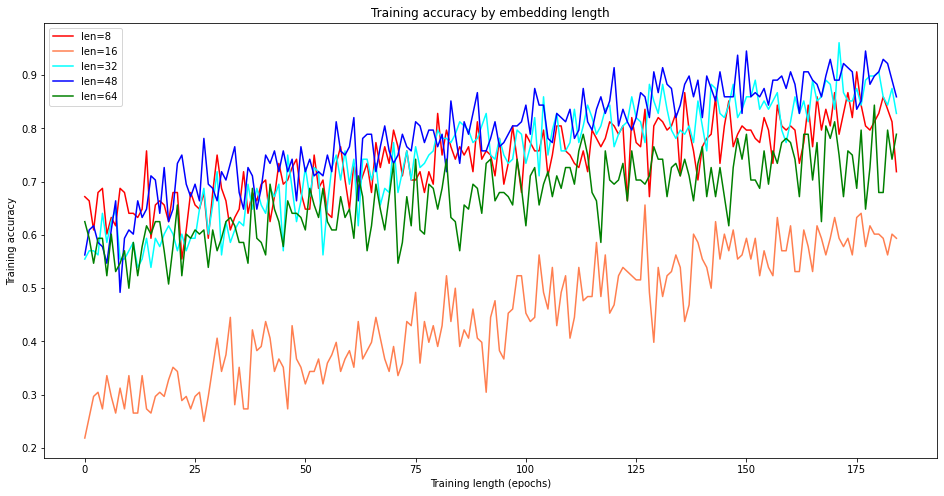

In [24]:
fig, ax = plt.subplots(figsize=(16, 8))
colors = ['red', 'coral', 'cyan', 'blue', 'green']
emb_lengths = [8, 16, 32, 48, 64]

for i in range(5):
    ax.plot(train_accuracy_matrix[i], color=colors[i], label=f'len={emb_lengths[i]}')
    
ax.set_title('Training accuracy by embedding length')
ax.set_xlabel('Training length (epochs)')
ax.set_ylabel('Training accuracy')
ax.legend()
plt.show()

Give your observation and explanation below.

Longer embedding length tends to increase training accuracy up till len=48, except for the dip between len=8 and len=16 (16 performed much more poorly than the others). This makes sense; embedding features into much lower dimensions destroys a lot of the information that the original feature might have held, decreasing accuracy. As the dimension of the embedding increases, more information is available to the LSTM, causing accuracy to increase. At a certain point, though, the benefit of lowering the dimension of the encoding (reducing the "curse of dimensionality", where high-dimensional vectors become difficult to find distances between or differentiate) disappears, since the dimension of the embedding approaches a significant fraction of the original feature's dimension.